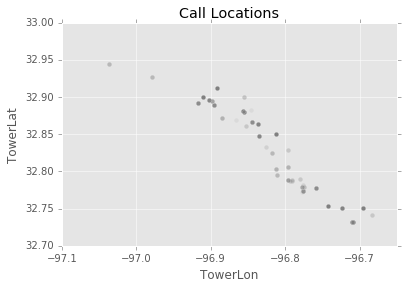

[[ 32.73299989 -96.70839404]]


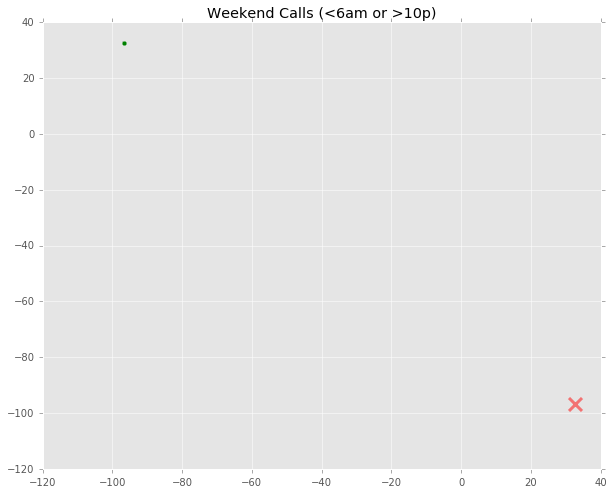

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
    if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
    plt.show()
    #exit()




#
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!


#
# TODO: Load up the dataset and take a peek at its head
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
#
# .. your code here ..
df = pd.read_csv(r"C:\Users\aaaaaaaa\Desktop\edX ML\Module 5 Clustering\Module5Clustering\Datasets\CDR.csv")
df.CallDate = pd.to_datetime(df.CallDate, errors='coerce')
df.CallTime = pd.to_timedelta(df.CallTime, errors = "coerce")

#
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
#
a = df.In
b = a.tolist()

# 
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above
#
user1 = df[df.In == b[0]]

# INFO: Plot all the call locations
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
showandtell()  # Comment this line out when you're ready to proceed


#
# INFO: The locations map above should be too "busy" to really wrap your head around. This
# is where domain expertise comes into play. Your intuition tells you that people are likely
# to behave differently on weekends:
#
# On Weekdays:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday



#
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're
# only examining records that came in on weekends (sat/sun).
#
user1 = user1[(user1.DOW == "Sat")|(user1.DOW == "Sun")]


#
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00).
# You can use < and > to compare the string times, just make sure you code them as military time
# strings, eg: "06:00:00", "22:00:00": https://en.wikipedia.org/wiki/24-hour_clock
#
# You might also want to review the Data Manipulation section for this. Once you have your filtered
# slice, print out its length:
#
user1 = user1[(user1.CallTime <"06:00:00")|(user1.CallTime > "22:00:00")]


#
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar
# with maps, you know well that your X-Coordinate should be Longitude, and your Y coordinate
# should be the tower Latitude. Check the dataset headers for proper column feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell
# phone tower position data; but considering the below are for Calls that arrived in the twilight
# hours of weekends, it's likely that wherever they are bunched up is probably near where the
# caller's residence:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
#showandtell()  # TODO: Comment this line out when you're ready to proceed



#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you
# notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
# apart from one another), then increase K=2, with the goal being that one of the centroids will
# sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
# data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
# no feature scaling is required. Print out the centroid locations and add them onto your scatter
# plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(user1[["TowerLat","TowerLon"]])
labels = kmeans.predict(user1[["TowerLat","TowerLon"]])
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
print (centroids)




#showandtell()  # TODO: Comment this line out when you're ready to proceed



#
# TODO: Repeat the above steps for all 10 individuals, being sure to record their approximate home
# locations. You might want to use a for-loop, unless you enjoy typing.
#
# .. your code here ..

